In [30]:
import pandas
import seaborn as sns
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy
import os
sns.set_style('white')
sns.set_palette('Set2')
sns.set_context("paper", font_scale=1.8)

/home/davidsl/miniconda3/envs/tesis/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [22]:
classification = pandas.read_csv('tmp/atencion/no_att_1/mynewfile', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2])

def extract_component_label(full_label):
    """Given a full label, extracts the component classification label"""
    return full_label.lower()

classification['true_component'] = classification['true'].apply(extract_component_label)
classification['predicted_component'] = classification['prediction'].apply(extract_component_label)
classification.true_component.unique()


array(['O', 'majorclaim', 'claim', 'premise'], dtype=object)

In [32]:
print(sklearn.metrics.classification_report(classification.true_component, classification.predicted_component))

              precision    recall  f1-score   support

           O       0.23      0.01      0.02      9122
       claim       0.14      0.17      0.16      4590
  majorclaim       0.08      0.16      0.11      2077
     premise       0.43      0.61      0.51     13250

   micro avg       0.32      0.32      0.32     29039
   macro avg       0.22      0.24      0.20     29039
weighted avg       0.30      0.32      0.27     29039



Observed Agreement: 32.27%


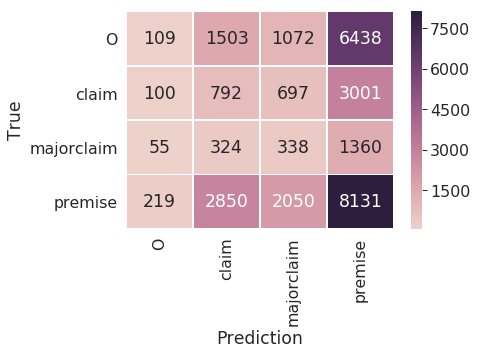

0.3226695134129963


In [31]:
def show_confusion_matrix(labels1, labels2, identifier1=None, identifier2=None):
    label_names = sorted(list(set(labels1)))
    matrix = metrics.confusion_matrix(labels1, labels2, labels=label_names)
    observed_agreement = numpy.trace(matrix) / float(numpy.sum(matrix)) * 100
    print('Observed Agreement: {0:.2f}%'.format(observed_agreement))
    colormap = plt.cm.cubehelix_r
    figure = sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5,
                         xticklabels=label_names, yticklabels=label_names,
                         cmap=sns.cubehelix_palette(8,  as_cmap=True))
    if identifier1 is not None:
        figure.set(ylabel=identifier1)
    if identifier2 is not None:
        figure.set(xlabel=identifier2)
    plt.show()



show_confusion_matrix(classification.true_component, classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(classification.true_component, classification.predicted_component))